In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, parameterimporter
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation

In [7]:
configdic=importer('EBM1D_Sellers_dynamic_config.ini')
variable_importer(configdic)
configdic1,paras=add_sellersparameters(configdic,\
            parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
eq=configdic1['eqparam']
rk=configdic1['rk4input']
fun=configdic1['funccomp']
Time,ZMT,GMT=rk4alg(model_equation,eq,fun)

Loading Configuration from: ../Config/EBM1D_Sellers_dynamic_config.ini
Loading Parameters from: ../Config/Data/SellersParameterization.ini


HBox(children=(IntProgress(value=0, max=25550), HTML(value='')))

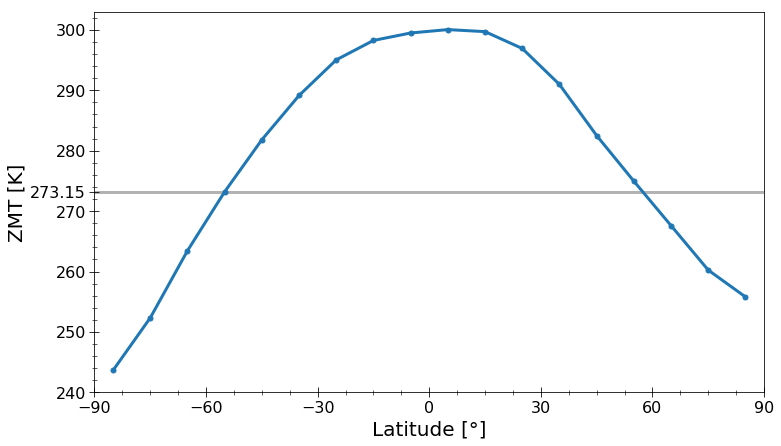

In [14]:
from lowEBMs import update_plotstyle
update_plotstyle()
from lowEBMs.Tutorials import plot_lat_temp
from lowEBMs.Packages.Variables import Vars
from lowEBMs.Packages.Functions import plotmeanstd
#plot_lat_temp(outputdata)
T=plotmeanstd(ZMT)
plt.figure(figsize=(12,7))
plt.plot(Vars.Lat,T[0],marker='.')
plt.xlabel('Latitude [°]'); plt.ylabel('ZMT [K]')
plt.xlim(-90,90); plt.ylim(240,303)
plt.hlines(273.15,xmin=-90,xmax=90,alpha=0.3)
plt.xticks(np.linspace(-90,90,7))
plt.yticks([240,250,260,270,273.15,280,290,300],[240,250,260,270,273.15,280,290,300])
plt.show()

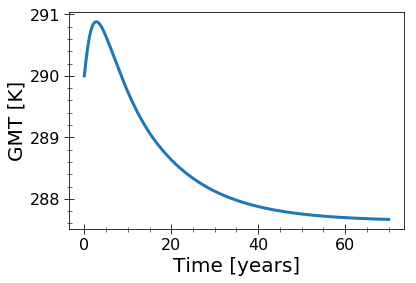

In [9]:
from lowEBMs.Tutorials import plot_time_temp

plot_time_temp([Time,ZMT,GMT])